#1. Data Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
data=pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/explaining-bonds-risk-premia-in-Turkey/main/Data.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,DATE,IECM10Y,GTTRY10Y_BID,GTTRY10Y_ASK,USDTRYV1M,USDTRYV3M,CDS5Y,TRYBE10,USDTRY25R3M
0,14.04.2010,10.64,10.37,10.36,9.8100,10.615,160.366,6.23,2.6975
1,15.04.2010,10.68,10.42,10.40,9.9900,10.760,163.067,6.34,3.2575
2,16.04.2010,10.68,10.42,10.40,10.0400,10.860,167.200,6.36,2.8450
3,19.04.2010,10.68,10.50,10.48,10.6400,11.340,169.780,6.40,2.9375
4,20.04.2010,10.68,10.42,10.41,10.3075,11.120,167.097,6.37,2.9400


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          2407 non-null   object 
 1   IECM10Y       2407 non-null   float64
 2   GTTRY10Y_BID  2407 non-null   float64
 3   GTTRY10Y_ASK  2407 non-null   float64
 4   USDTRYV1M     2407 non-null   float64
 5   USDTRYV3M     2407 non-null   float64
 6   CDS5Y         2407 non-null   float64
 7   TRYBE10       2407 non-null   float64
 8   USDTRY25R3M   2407 non-null   float64
dtypes: float64(8), object(1)
memory usage: 169.4+ KB


In [3]:
data.describe()

,IECM10Y,GTTRY10Y_BID,GTTRY10Y_ASK,USDTRYV1M,USDTRYV3M,CDS5Y,TRYBE10,USDTRY25R3M
count,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000
mean,10.591965,10.399809,10.326236,12.935851,13.321327,229.552440,7.604894,3.619458
std,2.993854,3.062595,2.987959,5.212341,4.394748,77.930287,2.510494,1.366260
min,6.100000,6.020000,5.980000,4.470000,5.475000,110.946000,4.500000,0.975000
25%,9.010000,8.850000,8.805000,10.017500,10.933750,176.011500,6.085000,2.872500
50%,9.730000,9.520000,9.460000,12.077500,12.637500,213.170000,6.830000,3.290000
75%,10.900000,10.630000,10.580000,14.755000,14.870000,265.643000,7.990000,4.172500
max,22.690000,21.490000,21.100000,61.477500,47.450000,574.405000,19.000000,11.862500


The bid-ask spread is the measure of market liquidity. The size of the bid-ask spread from one asset to another differs mainly because of the difference in liquidity of each asset. Certain markets are more liquid than others and that should be reflected in their lower spreads. Turkey Government Bond’s Bid-Ask spread was used to interpret liquidity and calculated like below.

In [4]:
data['LIQUIDITY']=(data['GTTRY10Y_BID']-data['GTTRY10Y_ASK']).apply(lambda x: round(x, 3))
data.head()

,DATE,IECM10Y,GTTRY10Y_BID,GTTRY10Y_ASK,USDTRYV1M,USDTRYV3M,CDS5Y,TRYBE10,USDTRY25R3M,LIQUIDITY
0,14.04.2010,10.64,10.37,10.36,9.8100,10.615,160.366,6.23,2.6975,0.01
1,15.04.2010,10.68,10.42,10.40,9.9900,10.760,163.067,6.34,3.2575,0.02
2,16.04.2010,10.68,10.42,10.40,10.0400,10.860,167.200,6.36,2.8450,0.02
3,19.04.2010,10.68,10.50,10.48,10.6400,11.340,169.780,6.40,2.9375,0.02
4,20.04.2010,10.68,10.42,10.41,10.3075,11.120,167.097,6.37,2.9400,0.01


In [5]:
#calculating returns of data
data['IECM10Y_R']=np.log(data['IECM10Y'].div(data['IECM10Y'].shift(1)))
data['LIQUIDITY_R']=np.log(data['LIQUIDITY'].div(data['LIQUIDITY'].shift(1)))
data['USDTRYV1M_R']=np.log(data['USDTRYV1M'].div(data['USDTRYV1M'].shift(1)))
data['USDTRYV3M_R']=np.log(data['USDTRYV3M'].div(data['USDTRYV3M'].shift(1)))
data['CDS5Y_R']=np.log(data['CDS5Y'].div(data['CDS5Y'].shift(1)))
data['TRYBE10_R']=np.log(data['TRYBE10'].div(data['TRYBE10'].shift(1)))
data['USDTRY25R3M_R']=np.log(data['USDTRY25R3M'].div(data['USDTRY25R3M'].shift(1)))
data.head()

,DATE,IECM10Y,GTTRY10Y_BID,GTTRY10Y_ASK,USDTRYV1M,USDTRYV3M,CDS5Y,TRYBE10,USDTRY25R3M,LIQUIDITY,IECM10Y_R,LIQUIDITY_R,USDTRYV1M_R,USDTRYV3M_R,CDS5Y_R,TRYBE10_R,USDTRY25R3M_R
0,14.04.2010,10.64,10.37,10.36,9.8100,10.615,160.366,6.23,2.6975,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.04.2010,10.68,10.42,10.40,9.9900,10.760,163.067,6.34,3.2575,0.02,0.003752,0.693147,0.018182,0.013567,0.016702,0.017502,0.188635
2,16.04.2010,10.68,10.42,10.40,10.0400,10.860,167.200,6.36,2.8450,0.02,0.000000,0.000000,0.004993,0.009251,0.025030,0.003150,-0.135397
3,19.04.2010,10.68,10.50,10.48,10.6400,11.340,169.780,6.40,2.9375,0.02,0.000000,0.000000,0.058043,0.043250,0.015313,0.006270,0.031996
4,20.04.2010,10.68,10.42,10.41,10.3075,11.120,167.097,6.37,2.9400,0.01,0.000000,-0.693147,-0.031749,-0.019591,-0.015929,-0.004699,0.000851


#2. Selecting Independent Variables
Lets try to find out if there is a correlation between the variables. In case of two of the independent variables are highly related, this leads to a problem called multicollinearity. This causes problems with the analysis and interpretation. Multicollinearity is the occurrence of high intercorrelations among independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results. In general, multicollinearity can lead to wider confidence intervals and less reliable probability values (P values) for the independent variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a4ab55cd0>,
      dtype=object)

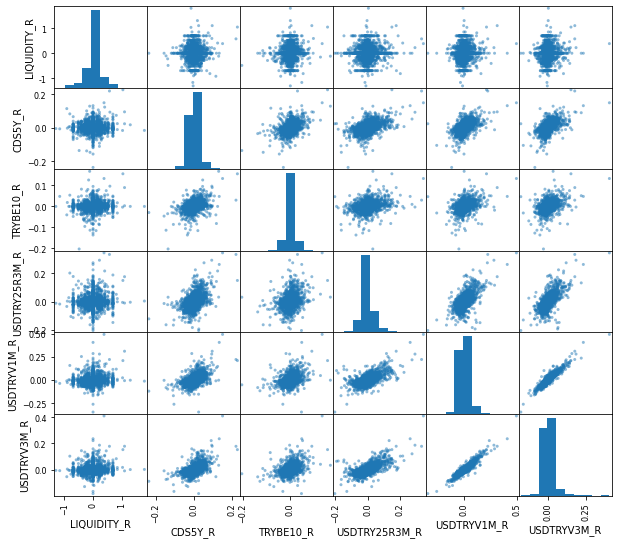

In [6]:
plotting.scatter_matrix(data[['LIQUIDITY_R', 'CDS5Y_R', 'TRYBE10_R', 'USDTRY25R3M_R','USDTRYV1M_R','USDTRYV3M_R']],figsize=(10,9))

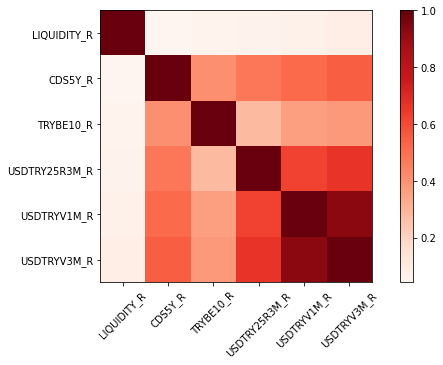

In [7]:
corr = (data[['LIQUIDITY_R', 'CDS5Y_R', 'TRYBE10_R', 'USDTRY25R3M_R','USDTRYV1M_R','USDTRYV3M_R']]).corr()

plt.figure(figsize=(10,5))
plt.imshow(corr, cmap='Reds')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=45)
plt.yticks(range(len(corr)),corr.columns)

plt.show();

According to the tables above; it seems that there is a multicollinearity between USDTRYV1M_R, USDTRYV3M_R and USDTRY25R3M_R.

In [8]:
reg = sm.ols('IECM10Y_R ~ LIQUIDITY_R + CDS5Y_R + TRYBE10_R + USDTRY25R3M_R+USDTRYV1M_R+USDTRYV3M_R', data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              IECM10Y_R   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     786.6
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:50   Log-Likelihood:                 8125.7
No. Observations:                2406   AIC:                        -1.624e+04
Df Residuals:                    2399   BIC:                        -1.620e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.091e-05      0.000      0.124

After regression with all independent variables, it is seen below that
USDTRYV1M_R and USDTRYV3M_R have higher P value in comparison with
USDTRY25R3M_R. Due to the multicollinearity between three independent
variables, USDTRYV1M_R and USDTRYV3M_R were removed from the model’s
prediction.

#3. Modelling

In [9]:
reg = sm.ols('IECM10Y_R ~ LIQUIDITY_R + CDS5Y_R + TRYBE10_R + USDTRY25R3M_R', data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              IECM10Y_R   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1158.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:50   Log-Likelihood:                 8110.1
No. Observations:                2406   AIC:                        -1.621e+04
Df Residuals:                    2401   BIC:                        -1.618e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.725e-05      0.000      0.102

The **adjusted R-squared** compares the explanatory power of a regression model that contains different number of predictors. It is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. These values range between 0 and 100. The resulting figure does not indicate how well a group of securities is performing, and it only measures how closely the returns from the holdings align to those of the measured benchmark.
According to the adjusted R-squared amount which is 65.8%, it means that all
independent variables can predict bond. The regression result is significant with 4 independent variables.

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutputs = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutputs['Critical Value (%s)'%key] = value
    print (dfoutputs)

#apply adf test on the series
print('ADF Results of Return of Liquidty:')
adf_test(data['LIQUIDITY_R'].dropna())
print('\nADF Results of Return of CDS5Y:')
adf_test(data['CDS5Y_R'].dropna())
print('\nADF Results of Return of TRYBE10R:')
adf_test(data['TRYBE10_R'].dropna())
print('\nADF Results of Return of USDTRY25R3M:')
adf_test(data['USDTRY25R3M_R'].dropna())


ADF Results of Return of Liquidty:
Results of Dickey-Fuller Test:
Test Statistic                  -21.500697
p-value                           0.000000
#Lags Used                        9.000000
Number of Observations Used    2396.000000
Critical Value (1%)              -3.433082
Critical Value (5%)              -2.862747
Critical Value (10%)             -2.567413
dtype: float64

ADF Results of Return of CDS5Y:
Results of Dickey-Fuller Test:
Test Statistic                  -21.779852
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    2400.000000
Critical Value (1%)              -3.433078
Critical Value (5%)              -2.862745
Critical Value (10%)             -2.567411
dtype: float64

ADF Results of Return of TRYBE10R:
Results of Dickey-Fuller Test:
Test Statistic                  -24.356817
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    2401.000000

The p-value from Augmented Dickey-Fuller Tests are much smaller than 5% significance level, therefore Null hypothesis can be rejected and instead accept the alternate hypothesis that stationary exists.
Taking a look at the critical value yields the same conclusion. The tests critical values are smaller than the 5% critical value and
so we have enough evidence to conclude that unit root does not exist. In other words,series are stationary.

In [11]:
Y=reg.params.Intercept
X1=reg.params.LIQUIDITY_R
X2=reg.params.CDS5Y_R
X3=reg.params.TRYBE10_R
X4=reg.params.USDTRY25R3M_R
data['MODEL']=X1*data.LIQUIDITY_R+X2*data.CDS5Y_R+X3*data.TRYBE10_R+X4*data.USDTRY25R3M_R
data['IECM10Y_FORECAST']= [sum((data['IECM10Y_R']-data['MODEL']).fillna(data['IECM10Y'].iloc[0])[0:i+1]) for i in range(len(data['IECM10Y_R']-data['MODEL']))]
data['RESULT']=data['IECM10Y']-data['IECM10Y_FORECAST']
data.head()

,DATE,IECM10Y,GTTRY10Y_BID,GTTRY10Y_ASK,USDTRYV1M,USDTRYV3M,CDS5Y,TRYBE10,USDTRY25R3M,LIQUIDITY,IECM10Y_R,LIQUIDITY_R,USDTRYV1M_R,USDTRYV3M_R,CDS5Y_R,TRYBE10_R,USDTRY25R3M_R,MODEL,IECM10Y_FORECAST,RESULT
0,14.04.2010,10.64,10.37,10.36,9.8100,10.615,160.366,6.23,2.6975,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.640000,0.000000
1,15.04.2010,10.68,10.42,10.40,9.9900,10.760,163.067,6.34,3.2575,0.02,0.003752,0.693147,0.018182,0.013567,0.016702,0.017502,0.188635,0.015578,10.628174,0.051826
2,16.04.2010,10.68,10.42,10.40,10.0400,10.860,167.200,6.36,2.8450,0.02,0.000000,0.000000,0.004993,0.009251,0.025030,0.003150,-0.135397,-0.000731,10.628905,0.051095
3,19.04.2010,10.68,10.50,10.48,10.6400,11.340,169.780,6.40,2.9375,0.02,0.000000,0.000000,0.058043,0.043250,0.015313,0.006270,0.031996,0.004895,10.624010,0.055990
4,20.04.2010,10.68,10.42,10.41,10.3075,11.120,167.097,6.37,2.9400,0.01,0.000000,-0.693147,-0.031749,-0.019591,-0.015929,-0.004699,0.000851,-0.004006,10.628017,0.051983


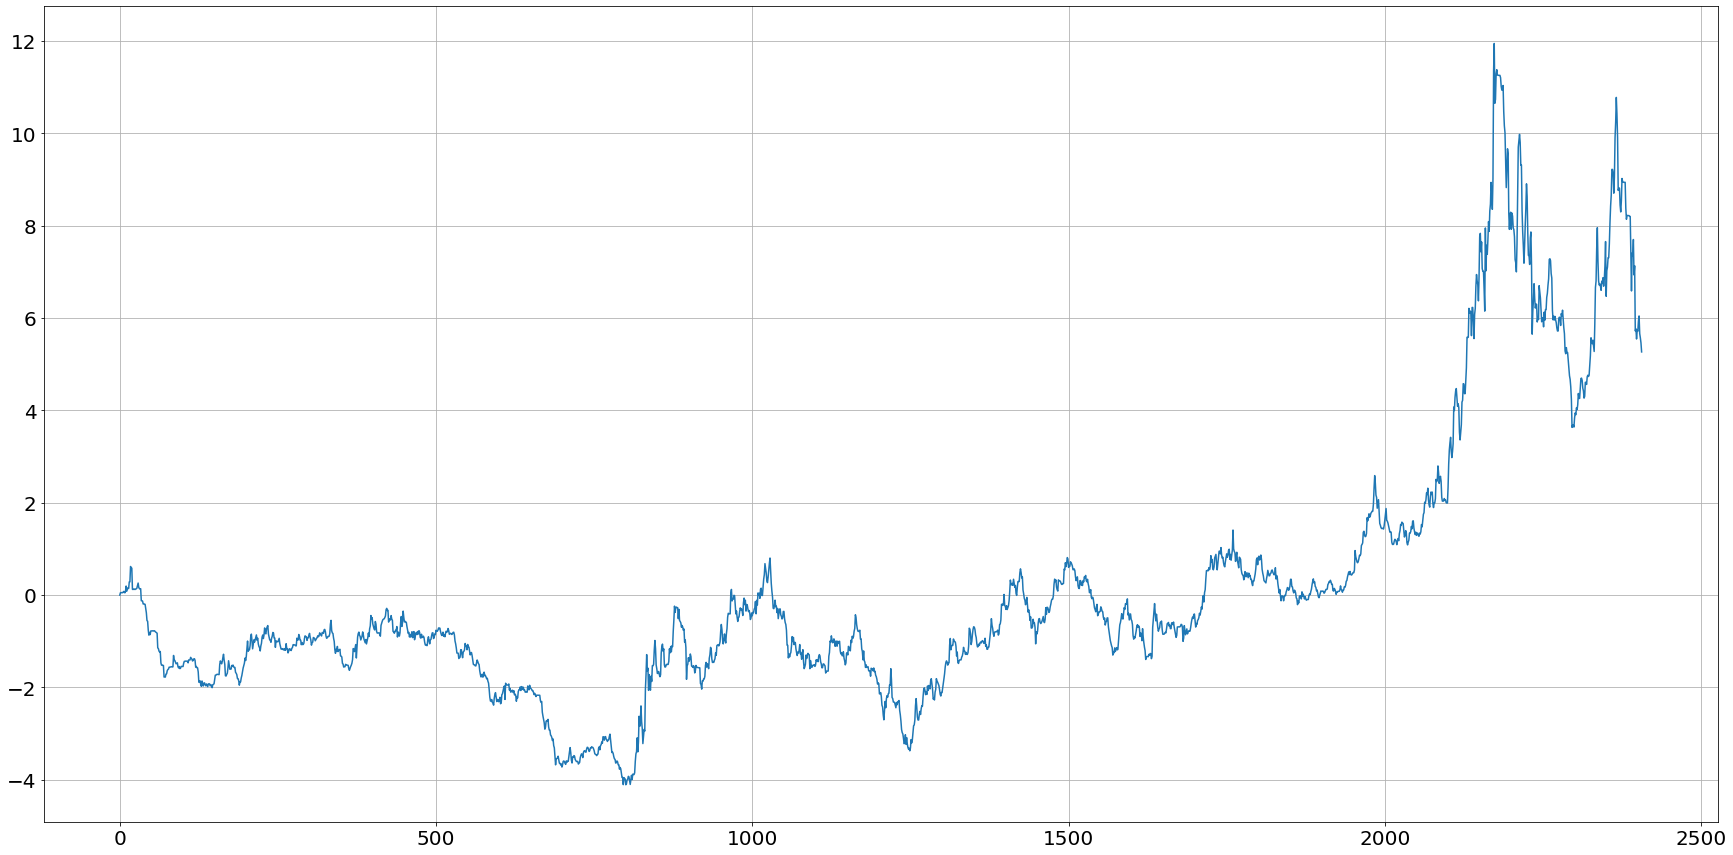

In [12]:
data.RESULT.plot(figsize=(30,15),grid=True,fontsize=20) 